In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

# Load the data

In [2]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [3]:
y.shape, tx.shape


((10000,), (10000, 2))

### NB: throughout this laboratory the data has the following format: 
  * there are **N = 10000** data entries
  * **y** represents the column vector containing weight information -- that which we wish to predict/the output (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,)**.
  * **tx** represents the matrix $\tilde{X}$ formed by laterally concatenating a column vector of 1s to the column vector of height information -- the input data (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,2)**.

## Warm-up Questions

### What does each column of X represent?
- The first column is a vector of ones (corresponding to the intercept term, w0​).
- The second column contains the feature values (in this case, heights xn1xn1​).

### What does each row of X represent?
- Each row represents the input features for a single data point. For a person nn, the row will contain:
        [1,xn1], [1,xn1​] where xn1xn1​ is the height of person nn.

### Why do we have 1’s in X?
- The ones are there to account for the bias term w0w in the linear model. Without this, the model would be forced through the origin, which is rarely desirable.

### If we have heights and weights of 3 people, what would be the size of yy and X? What would X_{3,2} represent?
        The size of y would be 3×1 (a column vector).
        The size of X would be 3×2. Each row contains a "1" and a height value.
        X_{3,2} represents the second feature (height) of the third person.

# 1. Computing the Cost Function
Fill in the `compute_loss` function below:

In [4]:
def compute_loss(y, tx, w):
    """Calculate the loss using either MSE or MAE.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2,). The vector of model parameters.

    Returns:
        the value of the loss (a scalar), corresponding to the input parameters w.
    """
    N = y.shape[0]
    error = y - np.dot(tx,w)
    mse = (1 / (2 * N)) * np.dot(error.T, error)
    return mse
    raise NotImplementedError

In [5]:
params = np.array([1,2])

loss = compute_loss(y,tx,params)
print(loss)

2694.483365887078


# 2. Grid Search

Fill in the function `grid_search()` below:

In [6]:
# from costs import *


def grid_search(y, tx, grid_w0, grid_w1):
    """Algorithm for grid search.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        grid_w0: numpy array of shape=(num_grid_pts_w0, ). A 1D array containing num_grid_pts_w0 values of parameter w0 to be tested in the grid search.
        grid_w1: numpy array of shape=(num_grid_pts_w1, ). A 1D array containing num_grid_pts_w1 values of parameter w1 to be tested in the grid search.

    Returns:
        losses: numpy array of shape=(num_grid_pts_w0, num_grid_pts_w1). A 2D array containing the loss value for each combination of w0 and w1
    """
    losses = np.zeros((len(grid_w0), len(grid_w1)))
    for i, w0 in enumerate(grid_w0):
        for j, w1 in enumerate(grid_w1):
            w = np.array([w0,w1])
            loss = compute_loss(y,tx,w)
            losses[i,j] = loss
            return losses
            raise NotImplementedError


Let us play with the grid search demo now!

Grid Search: loss*=0.0, w0*=-100.0, w1*=-116.66666666666666, execution time=0.004 seconds


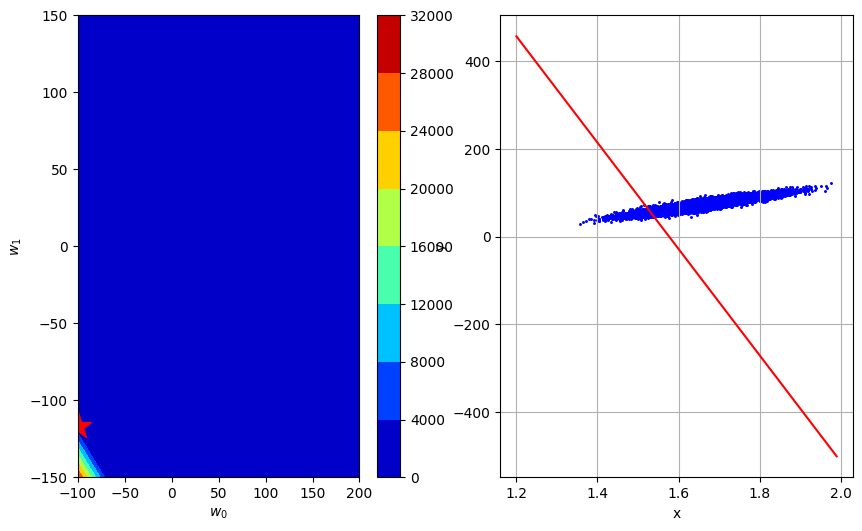

In [7]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=10)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print(
    "Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
        l=loss_star, w0=w0_star, w1=w1_star, t=execution_time
    )
)

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0, 6.0)
fig.savefig("grid_plot")  # Optional saving

# 3. Gradient Descent

Again, please fill in the functions `compute_gradient` below:

Please fill in the functions `gradient_descent` below:

In [8]:
def compute_gradient(y, tx, w):
    """Computes the gradient at w.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        An numpy array of shape (2, ) (same shape as w), containing the gradient of the loss at w.
    """
    N = y.shape[0]
    error = y - np.dot(tx,w)
    gradient = -1/N*np.dot(tx.T,error)
    return gradient
    raise NotImplementedError

In [9]:
y_test = np.array([1,2])
tx_test = np.array([[1,2],[3,4]])
w_test = np.array([100,20])
w2_test = np.array([50,10])

gradient_test = compute_gradient(y_test,tx_test,w_test)
gradient_test2 = compute_gradient(y_test,tx_test, w2_test)

print(gradient_test)
print(gradient_test2)

[636.5 895. ]
[316.5 445. ]


## What the values of the gradients tell us:

### Magnitude of the gradients:

- Far from the minimum (i.e., for w0=100, w1=20), the norm of the gradient will likely be larger. This indicates that the model parameters are far from the optimal solution, and the function is changing rapidly in that region. The larger gradient means the algorithm should take bigger steps to move closer to the optimal values.

- Closer to the minimum (i.e., for w0=50, w1=10), the norm of the gradient is likely to be smaller. This means the model parameters are already somewhat close to the optimal solution, and the function is changing more slowly. The smaller gradient suggests the algorithm should take smaller steps as it approaches the minimum.

### Bigger gradient near larger values of w0​ and w1​:

- The gradient will be larger when the values of w0w0​ and w1w1​ are far from the minimum (i.e., when we are farther from the optimal solution).
- The bigger gradient at w0=100 and w1=20 indicates that the model is far from the optimal weights. The gradient suggests a faster change is needed to adjust the parameters toward the minimum.

### Smaller gradient near optimal values:
- When w0=50 and w1=10, the gradient will be smaller because the model is closer to the minimum. This smaller gradient suggests that the step size should be smaller since the model is already approaching the solution.
- The smaller gradient means we are in a flatter region of the loss function, so the weights should be updated more conservatively to avoid overshooting the minimum.

In [10]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """The Gradient Descent (GD) algorithm.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of GD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of GD
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        gradient = compute_gradient(y,tx,w)
        loss = compute_loss(y,tx,w)
        w = w - gamma * gradient


        # store w and loss
        ws.append(w)
        losses.append(loss)
        print(
            "GD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [11]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1

# Initialization
w_initial = np.array([-1000, 1000])

# Start gradient descent.
start_time = datetime.datetime.now()
gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()

print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 0/49: loss=1062606.4462798787, w0=-892.6706077997898, w1=901.3479712434981
GD iter. 1/49: loss=860714.1448053957, w0=-796.0741548196002, w1=812.561145362647
GD iter. 2/49: loss=697181.3806110647, w0=-709.1373471374294, w1=732.6530020698812
GD iter. 3/49: loss=564719.8416136571, w0=-630.8942202234758, w1=660.7356731063916
GD iter. 4/49: loss=457425.9950257569, w0=-560.4754060009178, w1=596.0100770392513
GD iter. 5/49: loss=370517.9792895593, w0=-497.09847320061544, w1=537.7570405788249
GD iter. 6/49: loss=300122.48654323723, w0=-440.05923368034337, w1=485.3293077644413
GD iter. 7/49: loss=243102.13741871712, w0=-388.7239181120987, w1=438.14434823149577
GD iter. 8/49: loss=196915.65462785584, w0=-342.52213410067833, w1=395.67788465184515
GD iter. 9/49: loss=159504.60356725854, w0=-300.94052849039974, w1=357.4580674301594
GD iter. 10/49: loss=129201.65220817414, w0=-263.51708344114905, w1=323.0602319306422
GD iter. 11/49: loss=104656.26160731615, w0=-229.83598289682348, w1=292.10

In [12]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 4. Stochastic gradient descent

In [13]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient at w from a data sample batch of size B, where B < N, and their corresponding labels.

    Args:
        y: numpy array of shape=(B, )
        tx: numpy array of shape=(B,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the stochastic gradient of the loss at w.
    """

    N = y.shape[0]
    error = y - np.dot(tx,w)
    gradient = -1/N*np.dot(tx.T,error)
    return gradient
    raise NotImplementedError


def stochastic_gradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """The Stochastic Gradient Descent algorithm (SGD).

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic gradient
        max_iters: a scalar denoting the total number of iterations of SGD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SGD
    """

    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w

    for n_iter in range(max_iters):
        for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size):
            sg = compute_stoch_gradient(minibatch_y, minibatch_tx,w)
            loss = compute_loss(minibatch_y, minibatch_tx,w)
    
            w = w - gamma*sg
    
            # store w and loss
            ws.append(w)
            losses.append(loss)
            

        print(
            "SGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )
    return losses, ws

In [14]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD iter. 0/49: loss=2696.5521454147306, w0=7.343775793710932, w1=0.25833472932393964
SGD iter. 1/49: loss=3357.1509970854045, w0=15.537860241756857, w1=11.123814285068107
SGD iter. 2/49: loss=1877.906491629812, w0=21.66632904175872, w1=9.982539963636393
SGD iter. 3/49: loss=1028.3667128056877, w0=26.20145133957096, w1=4.1935372648472935
SGD iter. 4/49: loss=1510.9060967288879, w0=31.698552569726516, w1=7.162865896518815
SGD iter. 5/49: loss=469.6848386187453, w0=34.76346639761384, w1=4.195819276412648
SGD iter. 6/49: loss=403.9762776593771, w0=37.605917022196, w1=0.6606944037800639
SGD iter. 7/49: loss=662.5911022689701, w0=41.246222235413626, w1=2.8472164436011256
SGD iter. 8/49: loss=267.65950854149537, w0=43.55991844944647, w1=2.1987520787853247
SGD iter. 9/49: loss=664.5460449003441, w0=47.20558997853502, w1=3.449534595781083
SGD iter. 10/49: loss=581.1245325331492, w0=50.614767394080154, w1=3.1022551329416594
SGD iter. 11/49: loss=543.8451405400884, w0=53.91278237445877, w1=2.784

In [15]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses,
        sgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(sgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5. Effect of Outliers and MAE Cost Function

In [16]:
import datetime
from helpers import *

height, weight, gender= load_data(sub_sample=True, add_outlier=True)

x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [17]:
y.shape, tx.shape

((205,), (205, 2))

In [18]:
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)

end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

SGD iter. 0/49: loss=3514.154380252628, w0=58.684506410530325, w1=50.97859838735797
SGD iter. 1/49: loss=20.28249758801155, w0=63.142852251338475, w1=50.96377773384256
SGD iter. 2/49: loss=62.65098081680604, w0=70.97853736500083, w1=50.9521795972925
SGD iter. 3/49: loss=37.21557833887337, w0=77.01768190475941, w1=48.781151377183456
SGD iter. 4/49: loss=58.01737661671691, w0=69.4773218944958, w1=46.49048427424348
SGD iter. 5/49: loss=18.416196156759145, w0=73.72560063224641, w1=46.78027887311872
SGD iter. 6/49: loss=97.03695318673749, w0=83.4773294083662, w1=40.47796396919519
SGD iter. 7/49: loss=34.960498010045676, w0=89.33064368746012, w1=35.63049108265752
SGD iter. 8/49: loss=6.013720444755969, w0=91.75828576071987, w1=33.935503294040224
SGD iter. 9/49: loss=45.57372639473495, w0=85.07530350226368, w1=36.08708979639633
SGD iter. 10/49: loss=23.10240593732426, w0=89.83349200405486, w1=30.703980807657285
SGD iter. 11/49: loss=116.38883743136567, w0=79.15355470635791, w1=26.252860106237

In [19]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 6. Subgradient descent

In [20]:
def compute_loss_mae(y, tx, w):
    """
    Compute the Mean Absolute Error (MAE).

    Args:
        y: numpy array of shape=(N,), target values
        tx: numpy array of shape=(N, 2), input data
        w: numpy array of shape=(2,), model parameters (w0, w1)

    Returns:
        mae: a scalar representing the mean absolute error
    """
    # Compute the error (difference between predicted values and actual values)
    error = y - np.dot(tx, w)
    
    # Compute the Mean Absolute Error (MAE)
    mae = np.mean(np.abs(error))
    
    return mae


In [21]:
def compute_subgradient_mae(y, tx, w):
    """Compute a subgradient of the MAE at w.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the subgradient of the MAE at w.
    """
    # Compute the error (y - tx @ w)
    error = y - np.dot(tx, w)
    
    # Compute the subgradient
    subgrad = -np.dot(tx.T, np.sign(error)) / len(y)
    return subgrad
    raise NotImplementedError

In [22]:
def subgradient_descent(y, tx, initial_w, max_iters, gamma):
    """The SubGradient Descent (SubGD) algorithm.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubGD
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        loss = compute_loss_mae(y,tx,w)
        subgrad = compute_subgradient_mae(y,tx,w)
        w = w - gamma * subgrad

        ws.append(w)
        losses.append(loss)
        print(
            "SubGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )

    return losses, ws

In [23]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subgd_losses, subgd_ws = subgradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubGD: execution time={t:.3f} seconds".format(t=exection_time))

SubGD iter. 0/499: loss=75.02213752383784, w0=0.7, w1=1.3806841848679873e-15
SubGD iter. 1/499: loss=74.32213752383784, w0=1.4, w1=2.7613683697359746e-15
SubGD iter. 2/499: loss=73.62213752383784, w0=2.0999999999999996, w1=4.142052554603962e-15
SubGD iter. 3/499: loss=72.92213752383783, w0=2.8, w1=5.522736739471949e-15
SubGD iter. 4/499: loss=72.22213752383784, w0=3.5, w1=6.903420924339937e-15
SubGD iter. 5/499: loss=71.52213752383784, w0=4.2, w1=8.284105109207923e-15
SubGD iter. 6/499: loss=70.82213752383784, w0=4.9, w1=9.664789294075911e-15
SubGD iter. 7/499: loss=70.12213752383785, w0=5.6000000000000005, w1=1.1045473478943898e-14
SubGD iter. 8/499: loss=69.42213752383783, w0=6.300000000000001, w1=1.2426157663811886e-14
SubGD iter. 9/499: loss=68.72213752383784, w0=7.000000000000001, w1=1.3806841848679873e-14
SubGD iter. 10/499: loss=68.02213752383786, w0=7.700000000000001, w1=1.518752603354786e-14
SubGD iter. 11/499: loss=67.32213752383784, w0=8.4, w1=1.6568210218415847e-14
SubGD it

In [24]:
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subgd_losses,
        subgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(subgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

# Stochastic Subgradient Descent

**NB** for the computation of the subgradient you can reuse the `compute_subgradient` method that you implemented above, just making sure that you pass in a minibatch as opposed to the full data.

In [25]:
def stochastic_subgradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """Compute a stochastic subgradient at w from a data sample batch of size B, where B < N, and their corresponding labels.

    Args:
        y: numpy array of shape=(B, )
        tx: numpy array of shape=(B,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic subgradient
        max_iters: a scalar denoting the total number of iterations of SubSGD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubSGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubSGD
    """

    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w

    for n_iter in range(max_iters):
       for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size):
            subgradient = compute_subgradient_mae(minibatch_y, minibatch_tx,w)
            loss = compute_loss(minibatch_y, minibatch_tx,w)
    
            w = w - gamma*subgradient
           
    print(
         "SubSGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
        )
    )
    return losses, ws

In [26]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subsgd_losses, subsgd_ws = stochastic_subgradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubSGD: execution time={t:.3f} seconds".format(t=exection_time))

SubSGD iter. 499/499: loss=1.1654809906225532, w0=72.80000000000014, w1=16.596190855465327
SubSGD: execution time=0.009 seconds


In [27]:
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subsgd_losses,
        subsgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(subsgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=1, min=1), Output()), _dom_classes=('widget…

<function __main__.plot_figure(n_iter)>